In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('cardio.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
df.shape

(69301, 13)

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
# Observations :
# 1. No missing values
# 2. Assuming age is in number of days

In [ ]:
# Drop 'id' column
df = df.drop(columns='id')

In [14]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [ ]:
duplicate = df[df.duplicated()]
print(duplicate)

In [34]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(69277, 12)

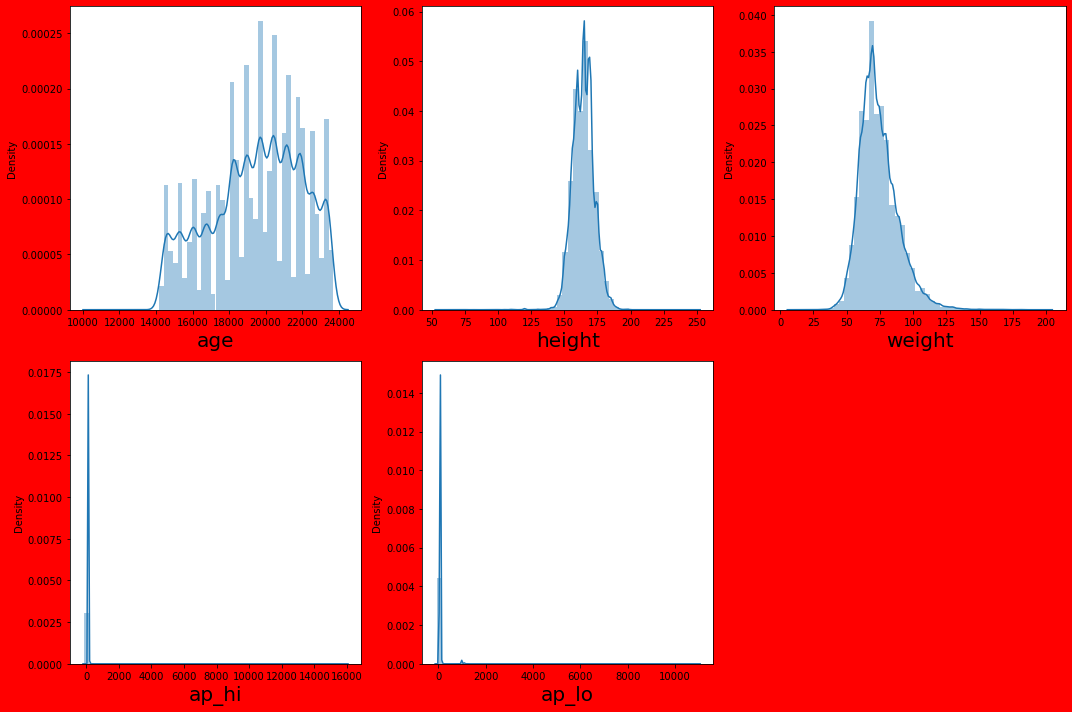

In [20]:
plt.figure(figsize=(15,10), facecolor="red")
plotnumber= 1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [35]:
from scipy.stats import zscore

z_score = zscore(df[['age','height','weight','ap_hi','ap_lo']])
abs_z_score = np.abs(z_score)
print(abs_z_score)

            age    height    weight     ap_hi     ap_lo
0      1.216018  1.140999  0.361739  0.007562  0.088052
1      1.953915  0.166017  0.222690  0.121658  0.140935
2      0.985802  0.077728  0.292214  0.057048  0.088052
3      1.994041  0.077728  0.750657  0.057048  0.088052
4      1.590525  1.140999  0.848413  0.057048  0.088052
...         ...       ...       ...       ...       ...
69296  0.092729  0.443347  0.124934  0.057048  0.088052
69297  1.269519  0.775381  3.601172  0.072172  0.035168
69298  0.163254  2.271438  2.141152  0.330612  0.035168
69299  1.200616  0.166017  0.153165  0.039867  0.088052
69300  0.434174  0.687092  0.153165  0.057048  0.088052

[69301 rows x 5 columns]


In [36]:
filtering_entry = (abs_z_score<3).all(axis=1)

In [37]:
df = df[filtering_entry]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000
mean,50464.625356,19466.692241,1.347189,164.374629,73.563569,126.162086,81.285394,1.361881,1.223495,0.087128,0.053262,0.803959,0.492743
std,28554.966112,2466.912538,0.476080,7.689291,13.194289,17.857326,10.234383,0.676988,0.569419,0.282024,0.224557,0.397003,0.499951
min,988.000000,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25736.500000,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50502.000000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75093.250000,21323.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


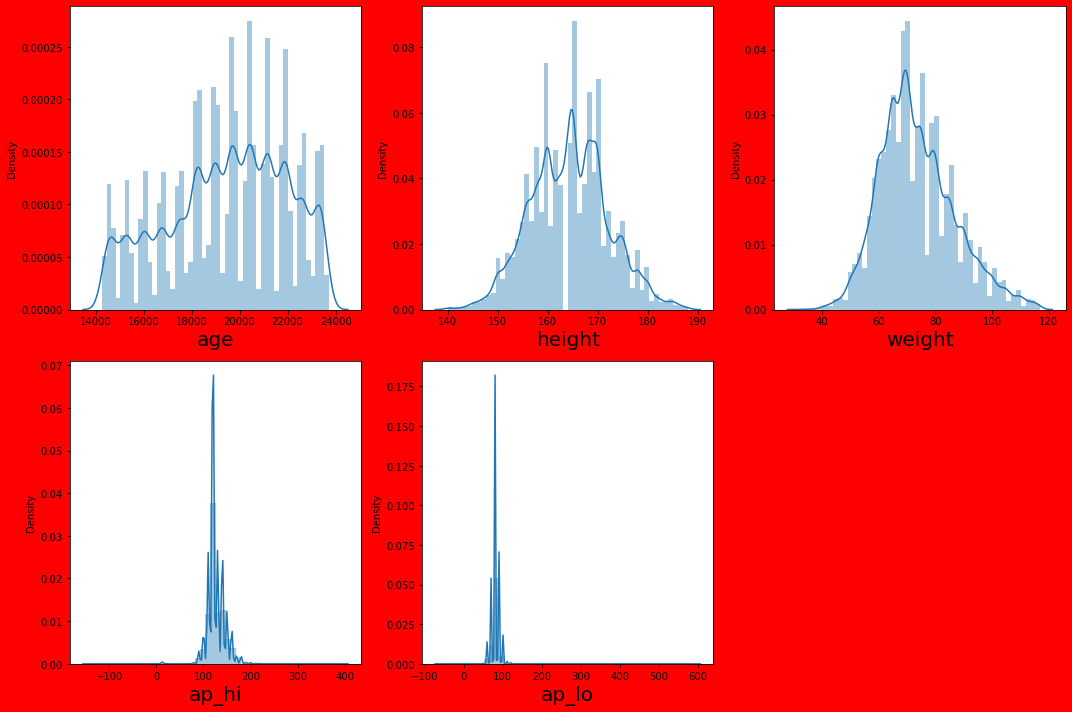

In [26]:
plt.figure(figsize=(15,10), facecolor="red")
plotnumber= 1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [38]:
X = df.drop(columns=['cardio'])
y = df['cardio']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=55)

In [40]:
rf = RandomForestClassifier()

In [41]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': range(10,20),
          'criterion': ['entropy','gini'],
          'max_depth': range(10,13),
          'min_samples_split':[10,11,12],
          'min_samples_leaf':[5,6,7]
         }
grd = GridSearchCV(rf,param_grid=params)

In [ ]:
grd.fit(x_train,y_train)
print(grd.best_params_)

In [ ]:
rf = grd.bes